# Photon-Box
Simulation of quantum feedback methods to stabilize photon-number states.

# 1. Introduction

Our goal is to **control the number of photons** inside a cavity. Atoms are repeatedly sent through the cavity, where they interact with the photons. Measuring their state gives some information on the cavity, and makes it possible to compute which control to apply. We say the cavity is the **system** (S) and the atom is the **meter** (M).

The cavity is modelled by a [quantum harmonic oscillator](https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator). Its Hamiltonian can be written as a function of the pulsation $\omega_C$ of the cavity, and the annihilation and creation operators $\mathbf{a}$ and $\mathbf{a}^{\dagger}$:

$$
\mathbf{H}_{S}=\omega_{C}\left(\mathbf{a}^{\dagger} \mathbf{a}+\frac{1}{2}\right)
$$

Each atom is modelled as a [two-state systems](https://en.wikipedia.org/wiki/Two-state_quantum_system), the Hamiltonian of which can be expressed as a function of the difference in pulsation between the excited and ground states $\omega_{eg}$ using the Pauli operator $\sigma_{Z}$:

$$
\mathbf{H}_{\mathbf{M}}=\frac{\mathbf{\omega}_{\mathrm{eg}}}{2} \mathbf{\sigma}_{Z}
$$

The Hamiltonian of the **composite system**, which also takes into account the entanglement of the system and the meter, is of the form *(see [Haroche & Raimond](http://math0.bnu.edu.cn/~zhengc/material/macsoft/ebooksclub.org__Exploring_the_Quantum__Atoms__Cavities__and_Photons__Oxford_Graduate_Texts_.pdf), section 3.4)*:

$$
\mathbf{H}= \mathbf{H}_S + \mathbf{H}_M + \mathbf{H}_I = \frac{\omega_{\mathrm{eg}}}{2} \mathbf{\sigma}_{z} \otimes \mathbf{I}_{c}+ \mathbf{I}_{q} \otimes \omega_{c}\left(\mathbf{N}+\frac{\mathbf{I}}{2}\right)+i \frac{\Omega}{2} \mathbf{\sigma}_{\mathbf{X}} \otimes\left(\mathbf{a}^{\dagger}-\mathbf{a}\right)
$$

where $\mathbf{H}_I = i \frac{\Omega}{2} \mathbf{\sigma}_{\mathbf{X}} \otimes\left(\mathbf{a}^{\dagger}-\mathbf{a}\right)$ is the **interaction Hamiltonian**, which describes the coupling between $S$ and $M$, and $\mathbf{N} = \mathbf{a}^{\dagger} \cdot \mathbf{a}$ is the "photon number" operator.

We will work in the **dispersive approximation** $\Omega \ll\left|\omega_{c}-\omega_{\mathrm{eg}}\right|$, meaning that the cavity and atoms are far from resonant. In this case, the interaction Hamiltonian is given by the simpler expression:

$$
\mathbf{H}_I \approx \mathbf{H}_{\mathrm{disp}}= -\frac{\chi}{2} \mathbf{\sigma}_{Z}\left(\mathbf{N}+\frac{\mathbf{I}}{2}\right)
$$

where $\chi=\frac{\Omega^{2}}{2\left(\omega_{c}-\omega_{\mathrm{eg}}\right)}$.




# 2. Description of the Open Loop apparatus

![experiment](pics/experiment.png)


An atom leave the box $B$, where it has been prepared in its ground state $| g \rangle$. Initially the cavity is in a coherent state $|\psi \rangle$ such that the mean number of photons corresponds to the Fock state we want to stabilize. The state of the composite system is then given by: $| \Psi \rangle=| \psi \rangle \otimes | g \rangle$.

The atom then traverse a first cavity $R$<sub>1</sub>. Next, it passes through $S$ where it interacts with the photons: this is where the state of the composite system becomes entangled. The atom then travel through one last cavity $R$<sub>2</sub>. Finally, its state is measured in a field-ionization detector $D$.

The evolution of the composite system between the release of an atom from $B$ and the moment before it is measured is summed up in the Schrödinger propagator $U_{SM}$. The state of the full system after leaving $R_2$ is given by:

$$
\mathbf{U}_{S M}( | \psi\rangle \otimes | g \rangle )=\left(\mathbf{M}_{g} | \psi\right\rangle ) \otimes | g \rangle+\left(\mathbf{M}_{e} | \psi\right\rangle ) \otimes | e \rangle
$$


This formula defines the **measurement operators** $\mathbf{M}_g$ and $\mathbf{M}_e$: they tell us how the measurement of the atoms influences the state of the cavity. Under the dispersive approximation, it can be shown that:

$$
\left\{\begin{array}{l}{\mathbf{M}_{g}=\cos \left( (\phi_R+\bar{\phi} \mathbf{N}) / 2 \right)} \\ {\mathbf{M}_{e}=\sin \left( (\phi_R+\bar{\phi} \mathbf{N}) / 2 \right)}\end{array}\right.
$$

Following the measurement (hence the collapse of the wave function), the state of the cavity is:

$$
\left\{\begin{array}{c}{\frac{\mathbf{M}_{g} | \psi \rangle}{\sqrt{\left\langle\psi\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi \right\rangle}} \text{ with probability } 
\mathbb{P}_{g}=\left\langle\psi\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi\right\rangle
} \\ {\frac{\mathbf{M}_{\mathbf{e}} | \psi \rangle}{\sqrt{\left\langle\psi\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi \right\rangle}} \text{ with probability } 
\mathbb{P}_{e}=\left\langle\psi\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi\right\rangle
}\end{array}\right.
$$


The previous paragraphs referred to the journey of a single atom through the apparatus. Repeating this process by continuously sending atoms yields a [Markov process](https://en.wikipedia.org/wiki/Markov_chain), defined at step $k$ by:

$$|\psi_{k+1} \rangle =  \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} | \psi_{k} \rangle}{\sqrt{\left\langle\psi_{k}\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi_{k}\right\rangle}} \text{ with probability } 
\mathbb{P}^{(k)}_{g}=\left\langle\psi_k\left|\mathbf{M}_{g}^{\dagger} \mathbf{M}_{g}\right| \psi_k\right\rangle
} \\ {\frac{\mathbf{M}_{\mathbf{e}} | \psi_{k} \rangle}{\sqrt{\left\langle\psi_{k}\left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi_{k}\right\rangle}} \text{ with probability } 
\mathbb{P}^{(k)}_{e}=\left\langle\psi_k \left|\mathbf{M}_{e}^{\dagger} \mathbf{M}_{e}\right| \psi_k \right\rangle
}\end{array}\right.$$


We will see in the next paragraph that due to mistakes in the measurement process, we have access only to probability distributions of states rather than pure states. The bra-ket formalism is therefore insufficient: we must use [density matrices](https://en.wikipedia.org/wiki/Density_matrix).

Given a pure state before measurement, the state after the measure is:

$$\mathbf{\rho}_+ = \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g} }{\text{Tr}(\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g})}  \text{with probability } \mathbb{P}_g = \text{Tr}(\mathbf{M}_{g} \mathbf{\rho} \mathbf{M}^{\dagger}_{g}) } \\
 {\frac{\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e} }{\text{Tr}(\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e})}   \text{with probability } \mathbb{P}_e = \text{Tr}(\mathbf{M}_{e} \mathbf{\rho} \mathbf{M}^{\dagger}_{e}) }\end{array}\right.$$

Hence the associated Markov chain:
$$
\mathbf{\rho}_{k+1} = \left\{\begin{array}{c}{\frac{\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g} }{\text{Tr}(\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g})}  \text{with probability } \mathbb{P}_g = \text{Tr}(\mathbf{M}_{g} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{g}) } \\
 {\frac{\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e} }{\text{Tr}(\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e})}   \text{with probability } \mathbb{P}_e = \text{Tr}(\mathbf{M}_{e} \mathbf{\rho}_{k} \mathbf{M}^{\dagger}_{e}) }\end{array}\right.
$$



# 3. Simulation of the Open-loop system

We implemented the situation described above in the file `idealized_no_control.py`, in which we used the [QuTiP](http://qutip.org/) toolbox. The rest of this paragraph is a walkthrough of the code, followed by a description of our main results.

### Relevant modules

In [42]:
import qutip as q
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
%run display.py

### Simulation parameters
We first defined the main parameters of the simulation, starting with the number of steps in the Markov Chain `num_steps`.

In [43]:
num_steps = 300

Then comes the dimension `n` of the Hilbert space in which we chose to work. Since the Hilbert space in question is generated by the Fock photon number states, in this simulation its dimension is equal to the maximum possible number of photons.

In [44]:
n = 10

The target number of photons `target` and the corresponding Fock state density matrix `rho_target` are then defined. 

In [45]:
target = 3
rho_target = q.fock_dm(n,target)

Finally, the initial state is chosen as a coherent state with same mean number of photons as the target state. Its density matrix is called `rho_init`.

In [46]:
rho_init = q.coherent_dm(n,target**0.5)

### Measurement operators

We then define the variables `phi_bar` and `phi_R`, corresponding to $\bar{\phi}$ and $\phi_R$ in the expression of the measurement operators. They are chosen as advised in [Dotsenko et al. (2009)](https://arxiv.org/pdf/0905.0114.pdf).

In [47]:
phi_bar =  np.pi/n 
phi_R = np.pi/2 - phi_bar*target 

We now have all the tools in hand to define the measurement operators `Mg` and `Me`.

In [48]:
Mg = q.Qobj([[0 for i in range(n)] for j in range(n)])
Me = q.Qobj([[0 for i in range(n)] for j in range(n)])
for i in range(0,n):
    Mg += np.cos((phi_R + phi_bar * i)/2) * q.fock_dm(n,i)
    Me += np.sin((phi_R + phi_bar * i)/2) * q.fock_dm(n,i)

### Measurement superoperator

In [49]:
def measure_projection(rho, measurement_operator):
    res = measurement_operator * rho * measurement_operator.dag()
    return res/res.tr()

### Fidelity

In order to show the evolution of the cavity state, we must monitor its distance to the target state through time. A simple measure is the fidelity, defined (in this situation) by:
$$F(\rho) = \text{Tr}\left(\rho \rho_{tag}\right) = \text{Tr}\left(\rho | n_{tag} \rangle \langle n_{tag} |\right)$$

In [50]:
def fidelity(rho, rho_target):
    return (rho * rho_target).tr()

### The Open-loop Markov Chain
The function `markov_chain` takes the target number of photons as argument and returns a list of the values of the fidelity at each iteration. 

Let's plot the values of the fidelity:

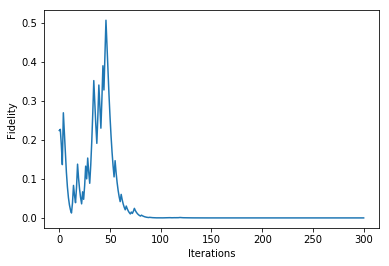

In [51]:
%run open_loop.py
res = open_loop_markov_chain(target)
display_open_loop(res)



# 4. A more general Framework

We have so far described the open loop apparatus and its simulation. However, we have not yet modelled the **effect of a control** on the cavity and atoms. As we shall see below, the control consists in the injection of a pulse into the cavity, which can be modelled by the [Glauber displacement operator](https://en.wikipedia.org/wiki/Displacement_operator).


For now, we remain in a finite dimensional setting: we artificially bound the number of photons in the cavity by some quantity $d$. This way, the Hilbert space defining the cavity is $\mathbb{C}^d$, and the density matrices live in the set $\mathcal{D}(\mathbb{C}^d) :=\left\{\rho \in \mathbb{C}^{d \times d} | \rho=\rho^{\dagger}, \operatorname{Tr}(\rho)=1, \rho \geq 0\right\}$. 

We follow [Amini et al. (2011)](https://arxiv.org/pdf/1103.1365.pdf) in defining the following Markov process, a generalization of the random walk defined in the previous paragraph:

$$
\rho_{k+1}=\mathbb{U}_{\alpha_{k}}(\mathbb{M}_{\mu_{k}}\left(\rho_{k}\right))
$$

with: 
* $\mathbb{M}_{\mu}$ the superoperator $\rho \mapsto \frac { \mathbf{M}_{\mu}\rho \mathbf{M}_{\mu}^{\dagger}} {\operatorname{Tr} (\mathbf{M}_{\mu}\rho \mathbf{M}_{\mu}^{\dagger})}$, with $\mathbf{M}_{\mu}$ the associated measurement operator.
* $\mathbb{U}_{\alpha}$ the superoperator $\rho \mapsto \mathcal{D}(u)\rho\mathcal{D}(-u)$ where $\mathcal{D}(\alpha) = e^{\alpha \mathbf{a}^{\dagger} - \alpha^{*} \mathbf{a}}$ is the [Glauber displacement operator](https://en.wikipedia.org/wiki/Displacement_operator).
* $\alpha_k$ the control at step $k$
* $\mu_k$ taking the value $\mu$ with probability $\operatorname{Tr} (\mathbf{M}_{\mu}\rho_{k}\mathbf{M}_{\mu}^{\dagger})$

Moreover, the experiment is set up in such a way that the following assumptions are verified:
* for every $\mu$, the measurement operator $\mathbf{M}_{\mu}$ is diagonal in the Fock basis. Said otherwise, it is a linear combination of the pure states $|n\rangle \langle n |$.
* given two distinct integers $1 \leq n_1 < n_2 \leq d$, there is at least one measurement outcome $\mu$ such that the probability of measuring $\mu$ is different in $|n_1\rangle \langle n_1|$ and in $|n_2\rangle \langle n_2|$.



# 5. Lyapunov functions, and a stochastic version of LaSalle's theorem

Our goal is to stabilize the target Fock state $|n_{tag}\rangle \langle n_{tag}|$, for some target number of photons $n_{tag}$. A general method for choosing a control so as to stabilize a particular state, both in deterministic and stochastic systems, is to define a [Lyapunov function](https://en.wikipedia.org/wiki/Lyapunov_function).

Though the details may vary quite a lot depending on the particular setting, the idea is for such a function $V$ to be non negative, to decrease as the system evolves, and to be minimal when and only when the system has reached the desired state.

Exhibiting a suitable Lyapunov function is useful to prove that a given point is a stable equilibrium, but also to chose a control so that the system converges to this equilibrium, by picking at each step the value of the control that **minimizes the Lyapunov function**.

An example in the **deterministic setting** would be to chose $V$ such that:
* $V$ is $C^1$.
* $\dot{V}(x) = \frac{d}{d t} V(x) \leq 0 \text { for all } x$

By [LaSalle's first theorem](https://en.wikipedia.org/wiki/LaSalle%27s_invariance_principle), this would imply that for every trajectory, its accumulation points are zeros of $\dot{V}$. Choosing $V$ astutely (for instance, such that $V(x)>0, \text { for all } x \neq 0$ and $V(0)=0$, following the hypotheses of LaSalle's second theorem) could therefore narrow down the set of possible stable accumulation points and ensure the stability of the origin $x^* = 0$.

In our case time is **discrete**, and due to the quantum nature of measurement we must opt for a **probabilistic approach**. To this effect, we use the following stochastic analogue of Lasalle's first theorem, which appears in [H.J. Kushner, 1971](https://www.amazon.com/Introduction-stochastic-control-Harold-Kushner/dp/0030849675), which we quote as in the appendix of [Amini et al. (2011)](https://arxiv.org/pdf/1103.1365.pdf):


> Let $(X_k)_{k \in \mathbb{N}}$ be a Markov chain on the compact state space $S$. Suppose there
exists a non-negative function $V(X)$ satisfying: $\mathbb{E}\left(V\left(X_{k+1}\right) | X_{k}\right)-V\left(X_{k}\right)=Q\left(X_{k}\right)$, where $Q(X)$ is a positive continuous function of $X$. Then the $\omega$-limit set $\Omega$ (in the sense of almost sure convergence) of $(X_k)$ is included in the following set: $I :=\{X | \ Q(X)=0\}$.



# 6. A first Lyapunov function: fidelity
## Definition

The first Lyapunov we used was the fidelity $F$, or to be more accurate $V = 1 - F$. Given a target Fock state $\rho_{tag}=|n_{tag}\rangle\langle n_{tag}|$ the fidelity is defined by :

$$\text{Tr}(\rho |n_{tag}\rangle\langle n_{tag}|)= \langle n_{tag}|\rho|n_{tag}\rangle$$

## Choice of the control $\alpha_k$

**Theorem**

We note $\rho_{k+\frac{1}{2}}=\mathbb{M}_{\mu_k}\rho_k$.
Let $1\gg\epsilon>0$ and $n_k=\sum_{n=1}^d n\langle n |\rho_{k+\frac{1}{2}}|n \rangle$ be the mean number of photons in the cavity for the state $\rho_{k+\frac{1}{2}}$. For all $k$, define:

$$\alpha_k = \left\{ \begin{array}{l c l}
c_1\text{Tr}([\rho_{tag},\textbf{a}^\dagger-\textbf{a}]\rho_{k+\frac{1}{2}})\quad&\text{if}&\quad F(\rho_{k+\frac{1}{2}})\geq\epsilon\\
c_2\text{sign}(n_{tag}-n_k)\quad&\text{if} &\quad F(\rho_{k+\frac{1}{2}})<\epsilon
\end{array}\right.
$$

with $c_1=\frac{1}{4 n_{tag}+2}$ and $c_2>0$ to chose.

Then $\rho_k$ almost surely converges to $\rho_{tag}$:

$$\mathbb{P}(\rho_k \longrightarrow \rho_{tag})=1$$.


**Proof**: for every step $k$ we have:

$$\begin{align}
\rho_{k+1} = &\mathbb{U}_{\alpha_k}\rho_{k+\frac{1}{2}}\\
= & \textbf{D}(\alpha_k)\,\rho_{k+\frac{1}{2}}\,\textbf{D}(-\alpha)\\
= & \rho_{k+\frac{1}{2}} - \alpha_k [\rho_{k+\frac{1}{2}},\textbf{a}^\dagger-\textbf{a}]+\frac{\alpha_k^2}{2}[[\rho_{k+\frac{1}{2}},\textbf{a}^\dagger-\textbf{a}],\textbf{a}^\dagger-\textbf{a}]
\end{align}$$

using the Baker-Campbell-Hausdorff formula (see Appendix) in the limit of small $\alpha_k$ and the formula $\textbf{D}(\alpha)=e^{\alpha\textbf{a}^\dagger-\alpha^{*}\textbf{a}}$.

Multplying by $|n_{tag}\rangle\langle n_{tag}|$ and applying $\text{Tr}$ we easily obtain :
$$
F(\rho_{k+1})=F(\rho_{k+\frac{1}{2}}) - \alpha_k\text{Tr}( [\rho_{k+\frac{1}{2}},\textbf{a}^\dagger-\textbf{a}]\rho_{tag})+\frac{\alpha_k^2}{2}\textbf{Tr}([[\rho_{k+\frac{1}{2}},\textbf{a}^\dagger-\textbf{a}],\textbf{a}^\dagger-\textbf{a}]\rho_{tag})
$$
Then with the expression of $\alpha_k$ :

$$F(\rho_{k+1})=F(\rho_{k+\frac{1}{2}})+\left( \text{Tr}([\rho_{tag},\textbf{a}^\dagger-\textbf{a}]\rho_{k+\frac{1}{2}})\right) ^2\left( c_1-\frac{c_1^2}{2}\text{Tr}([\rho_{tag},\textbf{a}^\dagger-\textbf{a}])^2\right)>F(\rho_{k+\frac{1}{2}})$$

where $c_1$ is in fact chosen to maximise the gain compare to $F(\rho_{k+\frac{1}{2}})$.

The previous equation can be rewritten:
$$F(\rho_{k+1})=F(\rho_{k+\frac{1}{2}})+f(\rho_{k+\frac{1}{2}})$$

with $f(\rho):=\left( \text{Tr}([\rho_{tag},\textbf{a}^\dagger-\textbf{a}]\rho)\right) ^2\left( c_1-\frac{c_1^2}{2}\text{Tr}([\rho_{tag},\textbf{a}^\dagger-\textbf{a}])^2\right)$

Using $[\textbf{M}_\mu,\rho_{tag}]=0$ and $\textbf{M}_e\textbf{M}_e^\dagger+\textbf{M}_g\textbf{M}_g^\dagger=\textbf{1}$ we prove easily that :

$$\mathbb{E}(F(\rho_{k+\frac{1}{2}})|\rho_k)=F(\rho_k)$$

Thus :

$$\mathbb{E}(F(\rho_{k+1})|\rho_k)-F(\rho_k)=\sum_{\mu\in\{ e,g\}}P_{\mu, \rho_k}f(\mathbb{U}_{\alpha_k}\mathbb{M}_\mu\rho_k)=Q(\rho_k)>0$$

Then, the stochastic version of LaSalle's theorem mentioned above gives us a piece of information on $\Omega$, the $\omega$-limit set :

$$\Omega \subset \{ \rho|Q(\rho)=0\}$$

Moreover, some manipulations gives $Q(\rho)=0 \implies \exists n\in \{1, \ldots, d \}, \rho=|n\rangle\langle n |$.

So we have proven that $\rho_k$ converges towards a Fock state. However, the limit could be the wrong Fock state: such a state would still be such that $F(\rho)=0$. It is to avoid these erroneous convergences that we define the "kick" $c_2 \cdot \text{sign}(n_{tag}-n_k)$ when $F(\rho_{k+\frac{1}{2}})<\epsilon$.

## 7. Simulation of the controlled system with fidelity

Now that we have described one method to chose the control to apply to the cavity, we turn to its implementation. Recall the general principle: measuring the system makes it possible to produce an estimate of the state of the cavity following the measurement. The control is a function of this estimate.

In the current situation, we assume all measurements are exact: therefore our estimate of the state of the cavity after measurement is exact. However, this assumption will not hold in subsequent simulations, when we will have to take measurement omissions and errors into account.

When our estimate is not exact, we must distinguish the estimated density matrix `rho_estimate` from the actual density matrix `rho_real`. We will start making the difference now, so that we are prepared when the distinction becomes necessary. 

The experimenter (and the simulator) is only allowed to use `rho_estimate` to determine the control. However, the evolution of the actual system (*eg* the measurement results) depends on `rho_real`.

### Real and Estimated parameters

`rho_estimate` lives in a finite-dimensional Hilbert space whose dimension `n_estimate` is the maximum number of photon that can be unambiguously measured. In theory, `rho_real` lives in an infinite-dimensional space, but for computational purposes we restrain ourselves to a finite dimension `n_real > n_estimate`.

In [52]:
n_real = 20 # dimension of the Hilbert space describing the cavity 
n_estimate = 15 # maximum number of photon unambiguously measured

This implies that we must distinguish real and estimated target states.

In [53]:
target = 3 # we want to stabilize the Fock state |target>
rho_target_real = q.fock_dm(n_real,target) # target density matrix
rho_target_estimate = q.fock_dm(n_estimate,target) # target density matrix

The cavity parameters also differ.

In [54]:
phi_bar_estimate =  np.pi/n_estimate # parameter for phi(n)
phi_bar_real =  np.pi/n_real # parameter for phi(n)
phi_R_estimate = np.pi/2 - phi_bar_estimate*target # parameter for phi(n)
phi_R_real = np.pi/2 - phi_bar_real*target # parameter for phi(n)

So do the real and estimated initial states.

In [55]:
rho_init_real = q.coherent_dm(n_real,target**0.5) # initial density matrix
rho_init_estimate = q.coherent_dm(n_estimate,target**0.5) # initial density matrix

### Measurement operators
Once again, we must define both real and estimated measurement operators.

In [56]:
Mg_real = q.Qobj([[0 for i in range(n_real)] for j in range(n_real)])
Me_real = q.Qobj([[0 for i in range(n_real)] for j in range(n_real)])
Mg_estimate = q.Qobj([[0 for i in range(n_estimate)] for j in range(n_estimate)])
Me_estimate = q.Qobj([[0 for i in range(n_estimate)] for j in range(n_estimate)])
for i in range(0,n_real):
    Mg_real += np.cos((phi_R_real + phi_bar_real * i)/2) * q.fock_dm(n_real,i)
    Me_real += np.sin((phi_R_real + phi_bar_real * i)/2) * q.fock_dm(n_real,i)
for i in range(0,n_estimate):
    Mg_estimate += np.cos((phi_R_estimate + phi_bar_estimate * i)/2) * q.fock_dm(n_estimate,i)
    Me_estimate += np.sin((phi_R_estimate + phi_bar_estimate * i)/2) * q.fock_dm(n_estimate,i)

### Control parameters
We define the control parameters as in [Dotsenko et al. (2009)](https://arxiv.org/pdf/0905.0114.pdf). Since it is a Glauber displacement superoperator, the control is also a function of the annihilation and creation operators.

In [57]:
c_1 = 1/(4*target + 2)
c_2 = 0.1
epsilon = 0.001 
a_real = q.destroy(n_real) # annihilation operator; the creation operator is given by a_real.dag()
a_estimate = q.destroy(n_estimate) # annihilation operator; the creation operator is given by a_estimate.dag()

In [58]:
def displacement(rho,alpha, dimension):
    return q.displace(dimension, alpha)*rho*q.displace(dimension, -alpha)

We also write the function `commutator`, which (surprinsingly enough) computes the commutator of two operators.

In [59]:
def commutator(op1, op2):
    return op1 * op2 - op2 * op1

### The Closed-loop Markov Chain
The function `markov_chain` takes the target number of photons as argument and returns three lists:
* a list of the fidelity of the real state at each iteration. 
* a list of the fidelity of the estimated state at each iteration. 
* a list containing the value of the control at each iteration. 

This function `display_results_fidelity` (available in the file `display.py`) plots the results of a simulation:

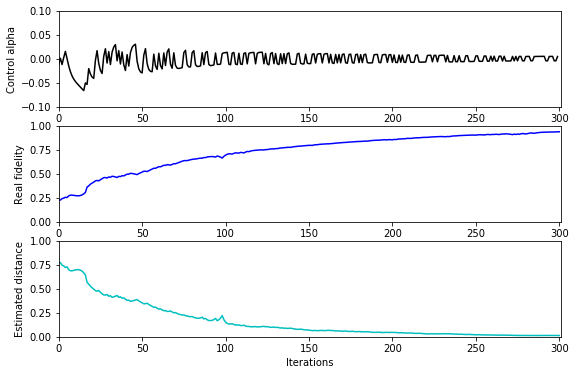

In [60]:
%run control.py
res = idealized_control_markov_chain()
display_results_fidelity(res)

## 8. Deviations from the previous model

This model is far from enough to describe the photon box experiment. Here are some of the elements it omits:

* The detector  $D$ does not measure all of the atoms that pass through it: there is a probability that it **missed an atom**.
* The detector $D$ sometimes gives **false measures**: there is a probability that it **made a mistake**.
* The cavity is not a perfect reflector: it may absorb photons. Some photons are also created due to thermal fluctuations. This **relaxation of the cavity** is described by the [Lindblad equation](https://en.wikipedia.org/wiki/Lindbladian).


Given a python file in this folder, the following table says whether or not the simulated system is controlled, and gives the corrections it does and doesn't includes. For instance, ```lindblad_control.py```  includes a control and takes the relaxation of the cavity into consideration via the Lindblad equation, but it does not account for delays, omissions and errors in the measurement process.


| Simulation                        | Control | Omit | Mistake | Relaxation |
| :--------------------------------:|:-------:| :---:| :------:| :---------:|
| ```open_loop.py```                |  No     | No   | No      | No         |
| ```control.py```                  |  Yes    | No   | No      | No         |
| ```omission.py```                 |  Yes    | Yes  | No      | No         |
| ```omission_error.py```           |  Yes    | Yes  | Yes     | No         |
| ```omission_error_lindblad.py```  |  Yes    | Yes  | Yes     | Yes        |

### Omission: when measurement does not take place
Let $\eta$ be the probability of detecting the atom.

In [61]:
eta = 0.8 

If the atom is not detected then this still provides us with some information on the state of the cavity. However, since we do not know what the state of the atom is, $\rho_{k+1}$ becomes a mixture of the states associated with measuring $g$ and $e$. Indeed, the best we can do is to approximate $\rho_{k+1}$ by the expected value:

$$ \rho_{k+1} = \mathbb{P}_e \cdot \mathbb{M}_e(\rho_k) + \mathbb{P}_g  \cdot  \mathbb{M}_g(\rho_k) = M_e \rho_k M_e^{\dagger} + M_g \rho_k M_g^{\dagger}$$

Note that since $M_e M_e^{\dagger} + M_g M_g^{\dagger} = I$, the matrix $\rho_{k+1}$ is normalized: $\text{Tr}(\rho_{k+1}) = 1$.

We define the Kraus map described above in the function `kraus_map_omission`.

In [62]:
def kraus_map_omission(rho, Mg_estimate, Me_estimate):
    return Mg_estimate*rho*Mg_estimate.dag() + Me_estimate*rho*Me_estimate.dag()

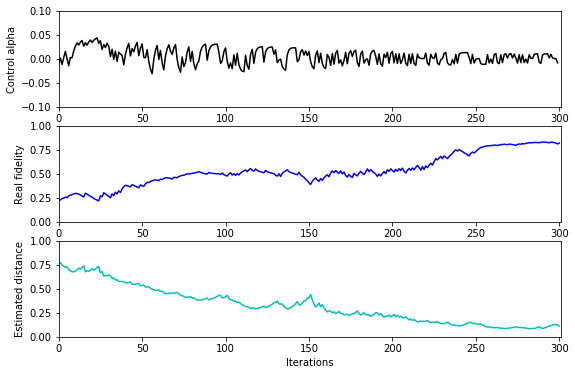

In [63]:
%run omission.py
res = omission_markov_chain()
display_results_fidelity(res)

### Adding measurement errors to the mix
Let $\eta_e$ be the probability of measuring $y=g$ when the atom is in fact in state $\mu=e$, and $\eta_g$ be the probability of measuring $y=e$ when the atom is in fact in state $\mu=g$.

In [64]:
eta_e = 0.13 
eta_g = 0.11

Suppose we have measured $y = g$: our estimate of the state of the cavity should take measurement errors into account. Bayes' rule gives:

$\mathbb{P}(\mu = g | y = g) = \mathbb{P}(y = g | \mu = g) \cdot \frac{\mathbb{P}(\mu = g)}{\mathbb{P}(y = g)}$ and $\mathbb{P}(\mu = e | y = g) = \mathbb{P}(y = g | \mu = e) \cdot \frac{\mathbb{P}(\mu = e)}{\mathbb{P}(y = g)}$

The expected value given the measurement outcome $y = g$ is therefore:

$$\tilde{\rho_{k+1}} = \mathbb{P}(\mu = g | y = g) \cdot \mathbb{M}_g(\rho_k) + \mathbb{P}(\mu = e | y = g) \cdot \mathbb{M}_e(\rho_k) = \frac {(1 - \eta_g) \cdot M_g \rho_k M_g^{\dagger} + \eta_e \cdot M_e \rho_k M_e^{\dagger}} {\mathbb{P}(y = g)}$$

When renormalized, this becomes:

$$\rho_{k+1} = (1 - \eta_g) \cdot M_g \rho_k M_g^{\dagger} + \eta_e \cdot M_e \rho_k M_e^{\dagger}$$

Similarly if the measurement outcome is $y = e$ the estimated state of the cavity is:

$$\rho_{k+1} = \eta_g \cdot M_g \rho_k M_g^{\dagger} + (1 - \eta_e) \cdot M_e \rho_k M_e^{\dagger}$$

The functions `kraus_map_mistake_e` and `kraus_map_mistake_g` below implement these Kraus maps:

In [65]:
def kraus_map_mistake_e(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate):
    res = eta_g * (Mg_estimate*rho_estimate*Mg_estimate.dag()) + (1 - eta_e) * (Me_estimate*rho_estimate*Me_estimate.dag())
    return res/res.tr()

def kraus_map_mistake_g(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate):
    res = eta_e * (Me_estimate*rho_estimate*Me_estimate.dag()) + (1 - eta_g) * (Mg_estimate*rho_estimate*Mg_estimate.dag())
    return res/res.tr()

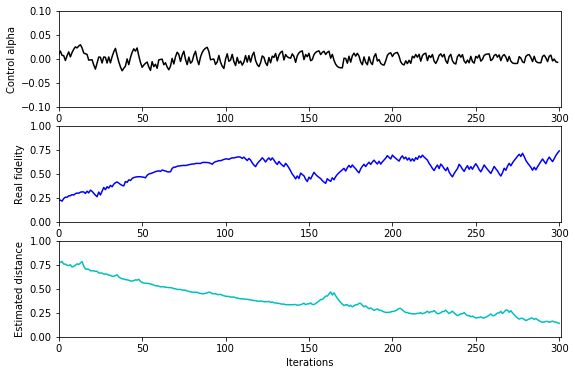

In [66]:
%run omission_error.py
res_omission_error = omission_error_markov_chain()
display_results_fidelity(res_omission_error)

### The Lindblad equation

In the actual experiment, mirrors can't be perfect. Indeed, due to thermal effects they can both absorb and create photons. Whenever this happens, these abnormalities must be spotted and taken into account in the estimation of the state of the cavity.

The evolution of the state of an imperfect cavity is described by the Linblad equation: 
$$
\frac{d \rho}{dt} = -\frac{\kappa}{2}(1 + n_{th})(\mathbf{a}^{\dagger}\mathbf{a}\rho + \rho\mathbf{a}\mathbf{a}^{\dagger}-2\mathbf{a}\rho\mathbf{a}^{\dagger}) - -\frac{\kappa}{2}(\mathbf{a}\mathbf{a}^{\dagger}\rho + \rho\mathbf{a}^{\dagger}\mathbf{a} - 2\mathbf{a}^{\dagger}\rho\mathbf{a})
$$

Where $n_{th} = 0.05$ is the average number of thermal photons in the cavity, and $\kappa = \frac{1}{T_{cav}}$, with $T_{cav}$ the mean lifetime of a photon in the cavity. We must have $\Delta T \ll T_{cav}$, with $T_{cav}$ the sampling period, which is why the pertinent parameter is $\frac{\Delta T}{T_{cav}}$. 

In [67]:
## Lindblad parameters
n_th = 0.05  #0.05
Delta_t = 1
T_cav = 1176  #1176

For computability purposes, we limit the creation and absorbtion of photons in the cavity to $1$ photon. Thus we use the operators given by the following formulas:
* no photon annihilation: $\mathbf{M_0} = \mathbf{I} - (1 + n_{th})\frac{\Delta}{2T_{cav}}\mathbf{a}^{\dagger}\mathbf{a} - n_{th}\frac{\Delta}{2T_{cav}} \mathbf{a}\mathbf{a}^{\dagger} $
* 1 photon annihilation: $\mathbf{M_{-1}} = \sqrt{(1 + n_{th})\frac{\Delta}{T_{cav}}}\mathbf{a}$
* 1 photon creation: $\mathbf{M_1} = \sqrt{n_{th}\frac{\Delta}{T_{cav}}}\mathbf{a}^{\dagger}$

In [68]:
# for rho_estimate
M_0_real = q.qeye(n_real) - (1 + n_th) * Delta_t / (2 * T_cav) * a_real.dag() * a_real - n_th * Delta_t / (2 * T_cav) * a_real * a_real.dag()
M_minus_1_real = np.sqrt((1 + n_th) * Delta_t / T_cav) * a_real
M_1_real = np.sqrt(n_th * Delta_t / T_cav) * a_real.dag()
# for rho_real
M_0_estimate = q.qeye(n_estimate) - (1 + n_th) * Delta_t / (2 * T_cav) * a_estimate.dag() * a_estimate - n_th * Delta_t / (2 * T_cav) * a_estimate * a_estimate.dag()
M_minus_1_estimate = np.sqrt((1 + n_th) * Delta_t / T_cav) * a_estimate
M_1_estimate = np.sqrt(n_th * Delta_t / T_cav) * a_estimate.dag()

Then the Kraus map associated with the Lindblad equation is given by:
$$
\hat{\mathbb{L}} \rho = \rho_{t + \Delta T} = \mathbf{M_0}\rho\mathbf{M_0}^{\dagger} + \mathbf{M_{-1}}\rho\mathbf{M_{-1}}^{\dagger} + \mathbf{M_1}\rho\mathbf{M_1}^{\dagger}
$$

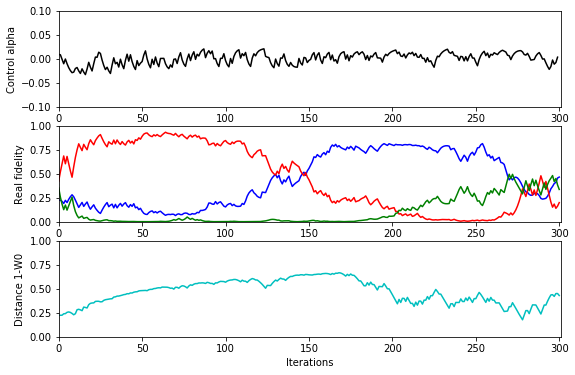

In [69]:
%run omission_error_lindblad.py
res_omission_error_lindblad = omission_error_lindblad_markov_chain()
display_results_fidelity_lindblad(res_omission_error_lindblad)

# 9. A new and more efficient Lyapunov function: $W_{\epsilon}$

In this part, the proofs are done in the idealized case (no Lindblad equation, measurement errors or omissions). However, the code below does take omissions and errors into account. The results in this section were proven in [Amini et al. (2011)](https://arxiv.org/pdf/1103.1365.pdf).

## Limits of fidelity

Even though fidelity leads to decent results and theoretically guarantees convergence, it is not wholly satisfying. The main issue is that without an *ad hoc* kick, fidelity does not prevent the system from converging towards a random Fock state $|n\rangle\langle n|$ with $n \ne n_{tag}$. This is due to the fact that the fidelity $F$ vanishes in each Fock state. The constant kick prevents convergence to the undesired Fock states, but is not optimized: indeed, it does not take into account the "distance" to the target state.

In order to sum up our goals, let us make a list of the desired properties expected from a correct Lyapunov function : 
* Obviously we want our function be maximal around the desired Fock state.
* When we encounter a Fock state which is not the target state, we want to move far from it with a small control (we want the system to change its state drastically even following a small perturbation). Since we chose our control in order to maximize the Lyapunov function, we are therefore looking for a **strongly convex function around the wrong Fock states**.
* Conversely, when the system has reached the desired state we do not want it to move. Thus we want even a small perturbation (i.e. control) to entail a huge diminution of the Lyapunov function, which corresponds to a **strongly concave function around the targeted Fock state**.


## The function $W_{\epsilon}$

In order to resolve the previously mentionned issues we introduce the function for $\epsilon > 0$ :

$$W_{\epsilon}(\rho):= \sum_{n=1}^d (\sigma_n\langle n|\rho|n\rangle + \frac{\epsilon}{4}\langle n|\rho|n\rangle^2) = W_0(\rho) + \frac{\epsilon}{4} \sum_{n=1}^d \langle n|\rho|n\rangle^2$$ 

where the number $(\sigma_n)_{1\leq n \leq d}$ are to be chosen wisely. The aim of such a Lyapunov function is to still adimts a maximum around $\rho_{tag}$  but to be strongly convex for a small control in the states $|n\rangle \langle n|$.

These results are summed up in the two followings lemmas:

**Lemma 1**: Assuming the undirected connectivity graph of the Hamiltonian $\textbf{H}=\textbf{a}^\dagger - \textbf{a}$ is connected. 
We note $\textbf{R}^{\textbf{H}}= (2(\delta_{n_1\,\,n_2}\langle n_1|\textbf{H}^2|n_2\rangle - \langle n_1|\textbf{H}|n_2\rangle^2))$.

Then :

$$\forall\lambda_n\geq 0, \quad n\ne n_{tag}, \quad \exists\sigma=(\sigma_n)_{n}\in\mathbb{R}^d, \quad | \quad \textbf{R}^{\textbf{H}}\sigma = -\lambda$$

where $\lambda = (\lambda_1, \,\ldots\, , -\sum_{n\ne n_{tag}}\lambda_n, \,\ldots\, , \lambda_d)^{T}$.

**Lemma 2**

Given $n_{tag}\in \{ 1,\,\ldots\, ,d\}$, let $\forall n\ne n_{tag},\lambda_n>0$. 

Then, lemma 1 gives us $\sigma\in\mathbb{R}^d$.

Then we have the desired local convexity and concavity properties:

$$\forall n\ne n_{tag}, \quad \frac{d^2 W_0(\mathbb{U}_\alpha|n\rangle\langle n|)}{d\alpha^2}\bigg|_{\alpha=0}=\lambda_n > 0 \text{ and } \frac{d^2 W_0(\mathbb{U}_\alpha|n_{tag}\rangle\langle n_{tag}|)}{d\alpha^2}\bigg|_{\alpha=0}=-\sum_{n\ne n_{tag}}\lambda_n < 0 $$

The functions `W_0_estimate` and `W_eps_estimate` below compute the values taken by the Lyapunov functions $W_0$ and $W_{\epsilon}$. `R` is the Laplacian matrix of the graph defined by the system's Hamiltonian.

In [111]:
R = np.zeros((n_estimate, n_estimate)) 
R[0][0] = 6
R[1][0] = -4
R[n_estimate - 1][n_estimate - 1] = 4*n_estimate + 2
R[n_estimate - 2][n_estimate - 1] = -2*n_estimate
for i in range(1, n_estimate - 1):
    R[i][i] = 4*(i+1) + 2
    R[i-1][i] = -2*(i+1)
    R[i+1][i] = -2*(i+1) - 2
R = np.matrix(R)

# Definition of "lambda_k" parameters
lambdas = np.zeros(n_estimate)
for i in range(n_estimate):
    if i == target:
        lambdas[i] = 1 - n_estimate
    else:
        lambdas[i] = 1
lambdas = np.matrix(lambdas).transpose()

# solve for sigma
sigmas = ((-1)*(np.linalg.inv(R))*lambdas).transpose()
tab = np.arange(n_estimate)
sigmas = np.array(sigmas)[0]
#plt.plot(tab, sigmas)

sigmas_norm = sigmas/sigmas[target]

# definition of matrix diag(sigmas_norm)
Sigma = np.zeros((n_estimate,n_estimate))
for i in range(n_estimate):
    Sigma[i][i] = sigmas_norm[i]
Sigma = q.Qobj(Sigma)

In [112]:
def W_0_estimate(rho):
    res = 0
    for i in range(n_estimate):
        res += sigmas_norm[i] * (q.fock_dm(n_estimate,i)*rho).tr()
    return res

In [113]:
# We can also define W_epsilon
eps = 1/(4*n_estimate + 2)

def W_eps_estimate(rho):
    w = W_0_estimate(rho)
    for i in range(n_estimate):
        w += (eps/4)*(q.fock_dm(n_estimate,i)*rho).tr()**2
    return w

The convergence of the Markov Chain with the new Lyapunov function is established in the following theorem:

**Theorem**

We are using the previous notations and assuming the hypothesis of the lemma.

Let $\epsilon > 0$ such that $\forall n\ne n_{tag}, \lambda_n+\epsilon(\langle n_1|\textbf{H}|n_2\rangle^2-\langle n_1|\textbf{H}^2|n_2\rangle)>0$.

Let, for an $\underline{\alpha}>0$ to be chosen :

$$\alpha_k = \underset{\alpha\in [-\underline{\alpha}, \underline{\alpha}]}{\text{argmax}}(W_{\epsilon}(\mathbb{U}_\alpha\rho_{k+\frac{1}{2}}))$$

Then : 

$$\mathbb{P}(\rho_k \longrightarrow \rho_{tag})=1 $$

**Proof**: The idea is to proove that $W_{\epsilon}(\rho_k)$ is a sub-martingale and then use the stochastic version of LaSalle's theorem.

A few computations leads to :

$$\mathbb{E}(W_{\epsilon}(\rho_{k+1})|\rho_k)-W_{\epsilon}(\rho_k)=Q_1(\rho_k)+Q_2(\rho_k) $$

where :

$$ \begin{align}
Q_1(\rho) &:= \sum_{\mu\in \{g, e\} }P_{\mu,\rho}(W_{\epsilon}(\mathbb{M}_{\mu}\rho)-W_{\epsilon}(\rho))\\
Q_2(\rho) &:= \sum_{\mu\in \{g, e\} }P_{\mu,\rho}(\underset{\alpha\in [-\underline{\alpha}, \underline{\alpha}]}{\text{max}}(W_{\epsilon}(\mathbb{U}_\alpha\mathbb{M}_{\mu}\rho))-W_{\epsilon}(\mathbb{M}_{\mu}\rho))
\end{align}$$

are two nonnegative continuous functions. Thus, the stochastic version of  LaSalle's theorem states that :

$$\Omega \subset \{ \rho  |  Q_1(\rho)=Q_2(\rho)=0\}$$

where $\Omega$ is the $\omega$-limit set of $(\rho_k)_{k\in\mathbb(N)}$.

Then, some small manipulations gives us that :

* $Q_1(\rho)=0$ implies $\exists n\in \{ 1,\ldots,d\}, \rho=|n\rangle\langle n|$

* $Q_2(|n\rangle\langle n|)=0$ implies $n=n_{tag}$

Which concludes the proof.

## Remark

The second lemma suggests that $\epsilon=0$ would be enough to have the desired result. However, this choice implies $Q_1=0$. Thus, the stochastic version of LaSalle's theorem would not give us enough information to conclude. $\epsilon$ seems to be mere tool for the proof to work out. In any case, we implemented both functions, and both seem to give satisfying results.

## Computating the control with these new Lyapunov functions

$\newcommand{\ket}[1]{|#1\rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$


Assuming that we use the Lyapunov function $W_{\epsilon}$, we can calculate the control with the following method.

Using Baker-Campbell-Hausdorff formula, we have:
$$
\mathbb{U}_{\alpha}(\rho) = \rho + \alpha [\mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho] + \frac{\alpha^2}{2}[[\mathbf{a}^{\dagger} - \mathbf{a},~ [ [\mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho]  ] + \mathcal{O}(\vert \alpha \vert^3)
$$
then we can write:
$$
\begin{align}
W_0(\mathbb{U}_{\alpha}(\rho)) = & Tr(\Sigma^{n_{tag}} \mathbb{U}_{\alpha}(\rho)) \\
   = & Tr(\Sigma^{n_{tag}} \rho) + \alpha Tr(\Sigma^{n_{tag}} [\mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho]) + \frac{\alpha^2}{2} Tr(\Sigma^{n_{tag}} [\mathbf{a}^{\dagger} - \mathbf{a},~ [ \mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho]  ]) + \mathcal{O}(\vert \alpha \vert^3)
\end{align}
$$
And, for $W_{\epsilon}$, we can also write $W_{\epsilon}(\mathbb{U}_{\alpha}(\rho)) = a_0^{\epsilon} + a_1^{\epsilon} \alpha  + a_2^{\epsilon} \frac{\alpha^2}{2} + \mathcal{O}(\vert \alpha \vert^3)$.
With:
$$ 
a_1^{\epsilon} =  Tr(\Sigma^{n_{tag}} \rho) + \frac{\epsilon}{2} \sum_{i = 1}^d \sigma_n \bra{n} \rho \ket{n} \bra{n} [\mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho] \ket{n}
$$
And
$$
a_2^{\epsilon} = Tr(\Sigma^{n_t} [\mathbf{a}^{\dagger} - \mathbf{a},~ [ \mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho]  ]) + \frac{\epsilon}{2} \sum_{i = 1}^d \sigma_n \bra{n} [\mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho] \ket{n}^2 + \frac{\epsilon}{2} \sum_{i = 1}^d \sigma_n \bra{n} \rho \ket{n} \bra{n} [\mathbf{a}^{\dagger} - \mathbf{a},~ [ \mathbf{a}^{\dagger} - \mathbf{a}, ~ \rho]  ] \ket{n}
$$
Thus, the computation of the control is easy
$$
\alpha_k = \underset{\alpha \in - [-\overline{\alpha}, \overline{\alpha}]}{argmax}~(W_0(\mathbb{U}_{\alpha}(\rho_{k + \frac{1}{2}})))
$$
The control $\alpha_k$ depends of the sign of $a_2$, $a_1$ and wheter $\frac{-a_1}{a_2} \in [-\overline{\alpha}, \overline{\alpha}]$ or not. It is equal to $\frac{-a_1}{a_2}$, $-\overline{\alpha}$ or $\overline{\alpha}$. It is computed in the code.


In [114]:
# Computation of the coefficients of the quadratic approximation
def a_1_eps(rho):
    a = (rho*commutator(Sigma,Delta)).tr()
    comm = commutator(Delta, rho)
    for i in range(n_estimate):
        a += (eps/2)*(q.fock_dm(n_estimate,i)*rho).tr()*(q.fock_dm(n_estimate,i)*comm).tr()
    return a
    
def a_2_eps(rho):
    a = (rho*commutator(commutator(Sigma,Delta),Delta)).tr()
    comm_1 = commutator(Delta, rho)
    comm_2 = commutator(Delta, commutator(Delta,rho))
    for i in range(n_estimate):
        a += (eps/2)*(q.fock_dm(n_estimate,i)*comm_1).tr()**2 + (eps/2)*(q.fock_dm(n_estimate,i)*rho).tr()*(q.fock_dm(n_estimate,i)*comm_2).tr()
    return a

# 10. Taking delays into account, and putting it all together

Below is the code for the full Markov-Chain, which performs a closed-loop simulation of the system, and takes into account:
* measurement omissions
* measurement errors
* Lindblad's equation
* atom delay

In [125]:
## Anticipation
# in this function: i is the iteration, tau is the delay
# alpha_values is [alpha_0, alpha_1, ... , alpha_{k-1}]
# rho_k_proj is the estimate state after the projection of the measure and Linblad Kraus map
def anticipation(i, tau, alpha_values, rho_k_proj):
    rho_ant = rho_k_proj #initialization
    for j in range(tau):
        if i + j - tau >= 0:
            if j == 0:
                rho_ant = displacement(rho_ant, alpha_values[i + j - tau], n_estimate)
            else:
                rho_ant = kraus_map_omission(rho_ant, Mg_estimate, Me_estimate)
                rho_ant =  kraus_Linblad_estimate(rho_ant, M_0_estimate, M_1_estimate, M_minus_1_estimate)
                rho_ant = displacement(rho_ant, alpha_values[i + j - tau], n_estimate)
        else:
            if j != 0:
                rho_ant = kraus_map_omission(rho_ant, Mg_estimate, Me_estimate)
                rho_ant =  kraus_Linblad_estimate(rho_ant, M_0_estimate, M_1_estimate, M_minus_1_estimate)
        rho_ant /= rho_ant.tr()
    # We need to apply a last time the measurement process
    rho_ant = kraus_map_omission(rho_ant, Mg_estimate, Me_estimate)
    rho_ant =  kraus_Linblad_estimate(rho_ant, M_0_estimate, M_1_estimate, M_minus_1_estimate)
    rho_ant /= rho_ant.tr()
    return rho_ant

In [126]:
## Markov_chain with good treatment of the delay
# alpha_bar is the maximum value of abs(alpha_k)
alpha_max = 0.1
Delta = (q.destroy(n_estimate)).dag() - q.destroy(n_estimate)
def lyapunov(rho_1, rho_2): # in this case the Lyapunov function is the trace distance
    return 1 - (rho_1 *rho_2).tr()


## Definition of p_inf, P_sup and the loss of information
def P_inf_real(rho):
    prob = 0
    for i in range(target):
        prob += (q.fock_dm(n_real,i)*rho).tr()
    return prob

def P_sup_real(rho):
    prob = 0
    for i in range(target + 1, n_real):
        prob += (q.fock_dm(n_real,i)*rho).tr()
    return prob

def loss_real(rho):
    loss = 0
    for i in range(n_estimate):
        loss += (q.fock_dm(n_real,i)*rho).tr()
    loss = 1 - loss
    return loss

def loss_estimate(rho):
    loss = 0
    for i in range(n_estimate):
        loss += (q.fock_dm(n_estimate,i)*rho).tr()
    loss = 1 - loss
    return loss

## Mean photon number
def mean_photon_estimate(rho):
    mean = 0
    for k in range(n_estimate):
        mean += k*(q.fock_dm(n_estimate, k)*rho).tr()
    return mean

def mean_photon_real(rho):
    mean = 0
    for k in range(n_real):
        mean += k*(q.fock_dm(n_real, k)*rho).tr()
    return mean

In [127]:
# tau is the delay
def markov_chain_delay_omission_errors(tau):
    fidelities_values_estimate = []
    dist_values_estimate = []
    fidelities_values_real = []
    alpha_k_values = []  ## Also used for feedback
    P_inf_values = []
    P_sup_values = []
    loss_values_real = []
    mean_values_estimate = []
    rho_real = rho_init_real # actual (pure) state of the system
    rho_estimate = rho_init_estimate # estimated density over possible states of the system
    dist_values_estimate.append(1 - W_eps_estimate(rho_estimate))
    fidelities_values_real.append(lyapunov(rho_real,rho_target_real))
    fidelities_values_estimate.append(lyapunov(rho_estimate, rho_target_estimate))
    P_inf_values.append(P_inf_real(rho_real))
    P_sup_values.append(P_sup_real(rho_real))
    loss_values_real.append(loss_real(rho_real))
    mean_values_estimate.append(mean_photon_estimate(rho_estimate))
    for i in range(num_steps):
        if int(i/500) == i/500:
            print("Iteration number:", i)
        # Measurement: project rho_real, project rho_estimate if measurement occurs
        proba_excited = np.real((Me_real*rho_real*Me_real.dag()).tr())
        mu = np.random.binomial(1, proba_excited) # 0 is ground, 1 is excited
        is_measured = np.random.binomial(1, eta)
        if mu == 0:
            rho_real = measure_projection(rho_real, Mg_real)
            if is_measured == 1:
                make_mistake = np.random.binomial(1, eta_g) # whether or not there is a detection error
                if make_mistake == 1: # we detect an excited state: y=e
                    rho_estimate = kraus_map_mistake_e(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate)
                else: # we detect a ground state: y=g
                    rho_estimate = kraus_map_mistake_g(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate)
        if mu == 1:
            rho_real = measure_projection(rho_real, Me_real)
            if is_measured == 1:
                make_mistake = np.random.binomial(1, eta_e) # whether or not there is a detection error
                if make_mistake == 1: # we detect a ground state: y=g
                    rho_estimate = kraus_map_mistake_g(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate)
                else: # we detect an excited state: y=e
                    rho_estimate = kraus_map_mistake_e(rho_estimate, eta_e, Me_estimate, eta_g, Mg_estimate)
        if is_measured == 0:
            rho_estimate = kraus_map_omission(rho_estimate, Mg_estimate, Me_estimate)
        # don't project rho_estimate if measurement occurs
        # Lindblad: project rho_real depending on whether a photon appears, disappears or nothing happens
        proba_0_real = np.real((M_0_real * rho_real * M_0_real.dag()).tr())
        proba_1_real = np.real((M_1_real * rho_real * M_1_real.dag()).tr())
        proba_minus_1_real = np.real((M_minus_1_real * rho_real * M_minus_1_real.dag()).tr())
        # # the probabilities are not perfectly normalized
        sum_proba = proba_0_real + proba_1_real + proba_minus_1_real
        proba_0_real /= sum_proba
        proba_1_real /= sum_proba
        proba_minus_1_real /= sum_proba
        lindblad_possible_outcomes = [1, 0, -1]
        lindblad_probabilities = [proba_1_real, proba_0_real, proba_minus_1_real]
        lindblad_outcome = np.random.choice(lindblad_possible_outcomes, 1, p=lindblad_probabilities)[0]
        if lindblad_outcome == 0:
            rho_real = M_0_real * rho_real * M_0_real.dag()
        elif lindblad_outcome == 1:
            rho_real = M_1_real * rho_real * M_1_real.dag()
            print("Atom number ", i, "Linblad outcome = ", 1)
        elif lindblad_outcome == -1:
            rho_real = M_minus_1_real * rho_real * M_minus_1_real.dag()
            print("Atom number ", i, "Linblad outcome = ", -1)
        rho_real /= rho_real.tr()
        rho_estimate =  kraus_Linblad_estimate(rho_estimate,M_0_estimate, M_1_estimate, M_minus_1_estimate)
        rho_estimate /= rho_estimate.tr() # To avoid numerical errors
        # Anticipation
        rho_ant = anticipation(i, tau, alpha_k_values, rho_estimate)
        # Control
        # This computed contol will be applied tau iterations later (in the algorithm)
        a1 = np.real(a_1_eps(rho_ant))
        a2 = np.real(a_2_eps(rho_ant))
        if a2 < 0:
            alpha_k = (-1)*a1/a2
            if abs(alpha_k) > alpha_max:
                alpha_k = np.sign(alpha_k)*alpha_max
        else:
            alpha_k = np.sign(a1)*alpha_max
        # Kick
        if np.real((rho_ant*q.fock_dm(n_estimate,target)).tr()) < epsilon and i >= tau*2:
            alpha_k = c_2*np.sign(target - mean_photon_estimate(rho_ant))
            print("Atom number ", i, "Kick = ", alpha_k)
        if i >= tau:
            rho_real = displacement(rho_real, alpha_k_values[i - tau], n_real)
            rho_estimate = displacement(rho_estimate,alpha_k_values[i - tau], n_estimate)
        # Add the Lyapunov value to the list
        alpha_k_values.append(alpha_k)
        dist_values_estimate.append(1 - W_eps_estimate(rho_estimate))
        fidelities_values_real.append(lyapunov(rho_real,rho_target_real))
        fidelities_values_estimate.append(lyapunov(rho_estimate, rho_target_estimate))
        P_inf_values.append(P_inf_real(rho_real))
        P_sup_values.append(P_sup_real(rho_real))
        loss_values_real.append(loss_real(rho_real))
        mean_values_estimate.append(mean_photon_estimate(rho_estimate))
    return fidelities_values_real, fidelities_values_estimate ,dist_values_estimate, alpha_k_values, P_inf_values, P_sup_values, loss_values_real, mean_values_estimate

In [ ]:
tau = 3
res = markov_chain_delay_omission_errors(tau)

Iteration number: 0


Graphing tools:

In [ ]:
def display_results(res):
    fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9,6))
    plt.rc('font',size=10)
    steps_plus = np.arange(num_steps + 1)
    steps = np.arange(num_steps)
    # Control
    control = res[3]
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Control alpha")
    ax1.set_xlim(0, num_steps + 1)
    ax1.set_ylim(-0.1,0.1)
    ax1.plot(steps, control, color = 'black')
    # Real probabilities
    fid = res[0].copy()
    P_inf = res[4]
    P_sup = res[5]
    for i in range(num_steps + 1):
        fid[i] = 1 - fid[i] #We transform fidelity into probability
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Real robabilities")
    ax2.set_xlim(0, num_steps + 1)
    ax2.set_ylim(0.0,1.0)
    ax2.plot(steps_plus, fid, color = 'b')
    ax2.plot(steps_plus, P_inf, color = 'r')
    ax2.plot(steps_plus, P_sup, color = 'g')
    # Lyapunov function
    dist_estimate = res[2]
    ax3.set_xlabel("Iterations")
    ax3.set_ylabel("Distance 1-W")
    ax3.set_xlim(0, num_steps + 1)
    ax3.set_ylim(0.0,1.0)
    ax3.plot(steps_plus, dist_estimate, color = 'c')
    plt.show()

def graph_real(res):
    fid = res[0].copy()
    P_inf = res[4]
    P_sup = res[5]
    for i in range(num_steps + 1):
        fid[i] = 1 - fid[i] #We transform fidelity into probability
    steps = np.arange(num_steps + 1)
    plt.ylim(0.,1.)
    plt.plot(steps, fid, color = 'b')
    plt.plot(steps, P_inf, color = 'r')
    plt.plot(steps, P_sup, color = 'g')
    plt.show()

def graph_control(res):
    control = res[3]
    steps = np.arange(num_steps)
    plt.plot(steps, control, color = 'black')
    plt.show()

def graph_dist_estimate(res):
    dist_estimate = res[2]
    steps = np.arange(num_steps + 1)
    plt.ylim(0.,1.)
    plt.plot(steps, dist_estimate, color = 'b')
    plt.show()

def graph_fidelities_estimate(res):
    fid = res[1]
    steps = np.arange(num_steps + 1)
    plt.ylim(0.,1.)
    plt.plot(steps, fid, color = 'b')
    plt.show()

def graph_loss_real(res):
    loss = res[6]
    steps = np.arange(num_steps + 1)
    plt.plot(steps, loss, color = 'orange')
    plt.show()

def graph_mean(res):
    mean = res[7]
    steps = np.arange(num_steps + 1)
    objective = [target for i in range(num_steps + 1)]
    plt.plot(steps, mean, color = 'g')
    plt.plot(steps, objective, color = 'r')
    plt.show()

def mean_prob(res):
    mean_values = res[0]
    total = 0
    for i in range(num_steps + 1):
        total += mean_values[i]
    mean = total/(num_steps + 1)
    return 1 - mean

In [ ]:
display_results(tau)

# Appendix: Baker-Campbell-Hausdorff formula

**Theorem** 
Let $\textbf{A}$ and $\textbf{B}$ two operators. Then, we have the following formula :

$$e^{\textbf{A}}\,\textbf{B}\, e^{\textbf{-A}} = \textbf{B}+\frac{1}{1!}[\textbf{A},\textbf{B}]+\frac{1}{2!}[\textbf{A},[\textbf{A},\textbf{B}]]+\frac{1}{3!}[\textbf{A},[\textbf{A},[\textbf{A},\textbf{B}]]]+...$$ 

**Proof**: Let define for $t\geqslant 0$ the function $Y$ as :

$$Y(t):= e^{\textbf{A}t}\,\textbf{B}\, e^{\textbf{-A}t}$$

Then we calculate its derivative :

$$\begin{align}
Y^{(1)}(t) = &\textbf{A}e^{\textbf{A}t}\,\textbf{B}\, e^{\textbf{-A}t}-e^{\textbf{A}t}\,\textbf{B}\, \textbf{A}e^{\textbf{-A}t}\\
= & e^{\textbf{A}t}\,\textbf{A}\,\textbf{B}\, e^{\textbf{-A}t}-e^{\textbf{A}t}\,\textbf{B}\, \textbf{A}\,e^{\textbf{-A}t}\\
= & e^{\textbf{A}t}\,[\textbf{A},\textbf{B}]\, e^{\textbf{-A}t}
\end{align}$$

And thus, an immediate recurrence gives us the followings :

$$ Y^{(2)}(t) =  e^{\textbf{A}t}\,[\textbf{A},[\textbf{A},\textbf{B}]]\, e^{\textbf{-A}t} $$
$$ Y^{(3)}(t) =  e^{\textbf{A}t}\,[\textbf{A},[\textbf{A},[\textbf{A},\textbf{B}]]]\, e^{\textbf{-A}t} $$
$$\vdots$$

Or we can write $Y$ as $Y(t)=\sum_{n=0}^{\infty} \frac{t^n}{n!}Y^{(n)}(0)$. Then the evaluation $t=1$ gives us the result.






## References
* Haroche and Raimond, [Exploring the Quantum:
Atoms, Cavities and Photons](http://math0.bnu.edu.cn/~zhengc/material/macsoft/ebooksclub.org__Exploring_the_Quantum__Atoms__Cavities__and_Photons__Oxford_Graduate_Texts_.pdf), 2006
* H.J. Kushner, [Introduction to Stochastic Control](https://www.amazon.com/Introduction-stochastic-control-Harold-Kushner/dp/0030849675), 1971
* Dotsenko et al., [Quantum feedback by discrete quantum non-demolition measurements:
towards on-demand generation of photon-number states](https://arxiv.org/pdf/0905.0114.pdf), 2009
* Amini et al., [Design of Strict Control-Lyapunov Functions
for Quantum Systems with QND Measurements](https://arxiv.org/pdf/1103.1365.pdf), 2011
* Amini et al., [Feedback stabilization of discrete-time quantum systems subject to
non-demolition measurements with imperfections and delays](https://arxiv.org/pdf/1201.1387.pdf), 2013
* Sayrin et al., [Real-time quantum feedback prepares and stabilizes
photon number states](https://arxiv.org/pdf/1107.4027.pdf), 2011
* Somaraju et al., [Semi-Global Approximate stabilization of an infinite
dimensional quantum stochastic system](https://arxiv.org/pdf/1103.1732.pdf), 2011

## Authors
This is a joint project by [Jean-Stanislas Denain](https://github.com/denainjs), Nicolas Guérin and Benjamin Dupuis, supervised by [Mazyar Mirrahimi](https://who.rocq.inria.fr/Mazyar.Mirrahimi/).

## License
This project is under the MIT license.
